# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('C:\A\Education\Data Science\human body temperature\human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


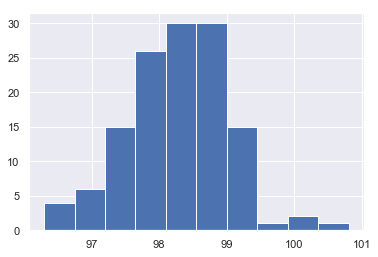

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_=plt.hist(df['temperature'],bins=10)

Q1. The dataset is not normally distributed according to this histogram because it's not symmetrical.

Q2. According to the Central Limit Theorem, if the data are not normally distributed, a sample which equals to or greater than 30 is big enough. The observations are independent because each observation measured an individual person.

In [5]:
import numpy as np


def draw_bs_reps(data, func, size=10000):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates



In [6]:
data=df['temperature']

In [7]:
#  Q3. Bootstrap one-sample hypothesis test

# Make an array of translated temperature: translated_temperature
translated_temperature = data-np.mean(data)+98.6

# Take bootstrap replicates of translated temperature: bs_replicates
bs_replicates = draw_bs_reps(translated_temperature, np.mean, 10000)


# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(data)) / 10000

# Print the p-value
print('p = ', p)



p =  0.0


As p=0.0, reject null hypothesis, the true populatiobn mean is not 98.6 degrees F.

In [8]:
# Q3. frequentist one-sample t-test
import scipy
scipy.stats.ttest_1samp(data,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

As p value is extremely small, reject null hypothesis.

In [9]:
# Q4. draw a sample of size 10
small_data=df['temperature'][0:10]
print(small_data)

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
5    99.2
6    98.0
7    98.8
8    98.4
9    98.6
Name: temperature, dtype: float64


In [10]:
# Q4. Bootstrap one-sample hypothesis test

# Make an array of translated temperature: translated_temperature
translated_temperature_small = small_data-np.mean(small_data)+98.6

# Take bootstrap replicates of translated temperature: bs_replicates
bs_replicates = draw_bs_reps(translated_temperature_small, np.mean, 10000)


# Compute fraction of replicates that are less than the observed temperature: p
p = np.sum(bs_replicates <= np.mean(small_data)) / 10000

# Print the p-value
print('p = ', p)


p =  0.4195


As p value is greater than 0.05, can not reject the null hypothesis

In [11]:
# Q4. one-sample t test
scipy.stats.ttest_1samp(small_data,98.6)

Ttest_1sampResult(statistic=-0.17381774143072845, pvalue=0.8658554880730941)

As p value is greater than 0.05, can not reject the null hypothesis

In [12]:
# Q5. Bootstrap 95% confidence interval
np.percentile(bs_replicates,[2.5,97.5])

array([98.29, 98.92])

In [13]:
# Q5. frequentist confidence interval
import scipy.stats as st

st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))

(98.12200290560804, 98.37645863285351)

In [14]:
# Q6. subset data for male and female
data_f=df['temperature'][df['gender']=='F']
data_m=df['temperature'][df['gender']=='M']

In [15]:
# Q6. Bootstrap two-sample hypothesis testing

# Compute mean of male and female
mean_temperature = np.mean(data)

#compute the difference of observed mean
empirical_diff_means=np.mean(data_f)-np.mean(data_m)

# Generate shifted arrays
data_f_shifted = data_f - np.mean(data_f) + mean_temperature
data_m_shifted = data_m - np.mean(data_m) + mean_temperature

# Compute 10,000 bootstrap replicates from shifted arrays

bs_replicates_f = draw_bs_reps(data_f_shifted, np.mean, size=10000)
bs_replicates_m = draw_bs_reps(data_m_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_f - bs_replicates_m

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)



p-value = 0.0112


p value is smaller than 0.05, reject null hypothesis, there is a significant difference in male and female normal temperature.